In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from bs4 import BeautifulSoup as bs
import pandas as pd
import requests

In [23]:
df = pd.read_csv("draft_combine_train.csv")
df

,player_id,player_name,yearDraft,yearCombine,numberPickOverall,position,height,weight,wingspan,reach_standing,standing_vertical,max_vertical,bench_reps,timeLaneAgility,timeThreeQuarterCourtSprint,timeModifiedLaneAgility,lengthHandInches,widthHandInches,body_fat_pct,drafted
0,202701.0,Nolan Smith,2011.0,2011,21.0,PG,73.50,187.6,77.50,99.0,28.5,34.0,9.0,11.05,3.17,NaN,8.50,9.25,5.6,True
1,203078.0,Bradley Beal,2012.0,2012,3.0,SG,75.25,201.8,80.00,100.0,33.0,39.0,8.0,10.95,3.28,NaN,8.50,9.00,6.0,True
2,2049.0,Speedy Claxton,2000.0,2000,20.0,PG,70.50,166.0,72.00,94.5,36.0,42.5,6.0,10.48,3.06,NaN,NaN,NaN,NaN,True
3,202718.0,Chandler Parsons,2011.0,2011,38.0,SF,80.75,221.2,81.50,104.5,25.5,31.5,4.0,11.05,3.29,NaN,8.25,10.00,7.0,True
4,201446.0,Mike Taylor,2008.0,2008,55.0,SG-PG,72.75,166.2,79.25,98.0,31.0,39.0,2.0,10.98,3.08,NaN,NaN,NaN,3.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,1629617.0,Reggie Perry,2020.0,2019,57.0,SF-PF,80.00,250.8,84.50,106.0,28.5,31.5,15.0,12.46,3.30,3.40,9.00,10.00,6.7,True
1112,12132.0,Eric Coley,NaN,2000,NaN,SG-SF,76.00,205.0,83.00,102.0,35.0,38.0,10.0,11.40,3.15,NaN,NaN,NaN,NaN,False
1113,2090.0,Justin Love,NaN,2000,NaN,PG-SG,73.50,205.5,76.50,97.5,31.0,38.5,24.0,10.99,3.31,NaN,NaN,NaN,NaN,False
1114,1628977.0,Hamidou Diallo,2018.0,2017,45.0,SG-SF,75.75,197.4,83.25,101.5,34.5,44.5,0.0,10.88,3.11,2.79,8.50,9.50,5.2,True


In [24]:
df.drop(["player_id", "timeModifiedLaneAgility"], axis=1, inplace=True)

# Convertir medidas a sistema métrico
df[['height', 'wingspan', 'max_vertical', 'standing_vertical', 'reach_standing', 'lengthHandInches', 'widthHandInches']] *= 2.54
df.columns = df.columns.str.replace('Inches', '')
df[["weight"]] *= 0.453592


df[['height', 'wingspan']] /= 100
df = df.round(2)

In [25]:
#bench_reps = repeticiones 185lbs(84 kg)
df = df.dropna(thresh=df.shape[1] - 4)
nan_counts = df.isna().sum()
print(nan_counts)


player_name                      0
yearDraft                      325
yearCombine                      0
numberPickOverall              325
position                         1
height                           0
weight                           0
wingspan                         0
reach_standing                   0
standing_vertical                5
max_vertical                     4
bench_reps                     135
timeLaneAgility                 11
timeThreeQuarterCourtSprint      9
lengthHand                     449
widthHand                      449
body_fat_pct                    73
drafted                          0
dtype: int64


In [26]:
df.info()
df.to_csv("DraftCombine.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 1115
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_name                  889 non-null    object 
 1   yearDraft                    564 non-null    float64
 2   yearCombine                  889 non-null    int64  
 3   numberPickOverall            564 non-null    float64
 4   position                     888 non-null    object 
 5   height                       889 non-null    float64
 6   weight                       889 non-null    float64
 7   wingspan                     889 non-null    float64
 8   reach_standing               889 non-null    float64
 9   standing_vertical            884 non-null    float64
 10  max_vertical                 885 non-null    float64
 11  bench_reps                   754 non-null    float64
 12  timeLaneAgility              878 non-null    float64
 13  timeThreeQuarterCou

In [27]:
df2 = pd.read_csv("DraftCombine.csv")
df2

,player_name,yearDraft,yearCombine,numberPickOverall,position,height,weight,wingspan,reach_standing,standing_vertical,max_vertical,bench_reps,timeLaneAgility,timeThreeQuarterCourtSprint,lengthHand,widthHand,body_fat_pct,drafted
0,Nolan Smith,2011.0,2011,21.0,PG,1.87,85.09,1.97,251.46,72.39,86.36,9.0,11.05,3.17,21.59,23.50,5.6,True
1,Bradley Beal,2012.0,2012,3.0,SG,1.91,91.53,2.03,254.00,83.82,99.06,8.0,10.95,3.28,21.59,22.86,6.0,True
2,Speedy Claxton,2000.0,2000,20.0,PG,1.79,75.30,1.83,240.03,91.44,107.95,6.0,10.48,3.06,NaN,NaN,NaN,True
3,Chandler Parsons,2011.0,2011,38.0,SF,2.05,100.33,2.07,265.43,64.77,80.01,4.0,11.05,3.29,20.96,25.40,7.0,True
4,Mike Taylor,2008.0,2008,55.0,SG-PG,1.85,75.39,2.01,248.92,78.74,99.06,2.0,10.98,3.08,NaN,NaN,3.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,Jerry Green,NaN,2001,NaN,PG-SG,1.87,81.19,1.99,251.46,72.39,88.90,13.0,11.70,3.17,NaN,NaN,5.5,False
885,Kwame Brown,2001.0,2001,1.0,PF-C,2.08,110.22,2.16,274.32,76.20,83.82,17.0,11.59,3.45,NaN,NaN,8.9,True
886,Reggie Perry,2020.0,2019,57.0,SF-PF,2.03,113.76,2.15,269.24,72.39,80.01,15.0,12.46,3.30,22.86,25.40,6.7,True
887,Hamidou Diallo,2018.0,2017,45.0,SG-SF,1.92,89.54,2.11,257.81,87.63,113.03,0.0,10.88,3.11,21.59,24.13,5.2,True


/tmp/ipykernel_76520/247369203.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



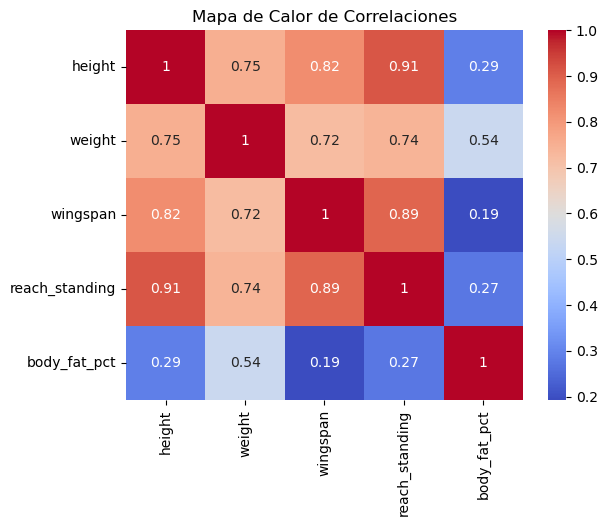

In [28]:
# Mapa de Calor
corr_matrix = df[['height', "position", 'weight', 'wingspan', 'reach_standing', "body_fat_pct"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()


# Gráfico de Caja
fig_box = go.Figure()
positions = ['PG', "PG-SG", "SG-PG", 'SG', "SG-SF", "SF-SG", 'SF', "SF-PF", "PF-SF", 'PF', "PF-C", "C-PF", 'C']
for position in positions:
    fig_box.add_trace(go.Box(y=df[df['position'] == position]['height'], name=position))
fig_box.update_layout(title='Distribución de Altura por Posición')
fig_box